#군집 분석

##KMC

In [41]:
#%%
# 라이브러리
import pandas as pd
import matplotlib.pyplot as plt
# 데이터 불러오기
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/\
00292/Wholesale%20customers%20data.csv')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### 데이터 분할

In [42]:
# %%
# 데이터 분할
X = df.iloc[:, :]
# 표준화
from sklearn import preprocessing
standard = preprocessing.StandardScaler()
ss = standard.fit(X)
X = ss.transform(X)


In [43]:
#%%
# 모형 학습
from sklearn import cluster
# 모형 객체
kmc = cluster.KMeans(n_clusters=5)
# kmc = cluster.KMeans(n_clusters=5, random_state=1)
kmc.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [44]:
# %%
cluster_label = kmc.labels_
df["cluster_no"] = cluster_label
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_no
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,2
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,2


<Axes: xlabel='Grocery', ylabel='Frozen'>

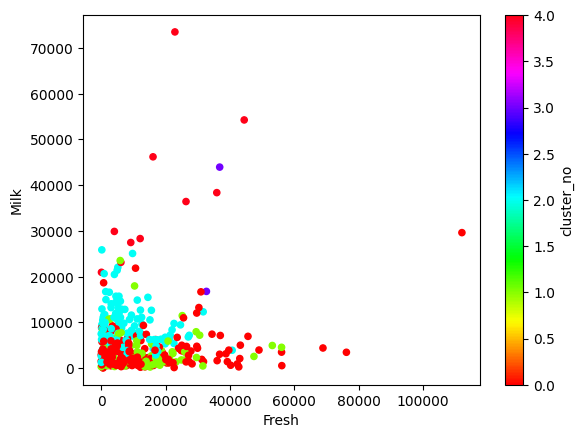

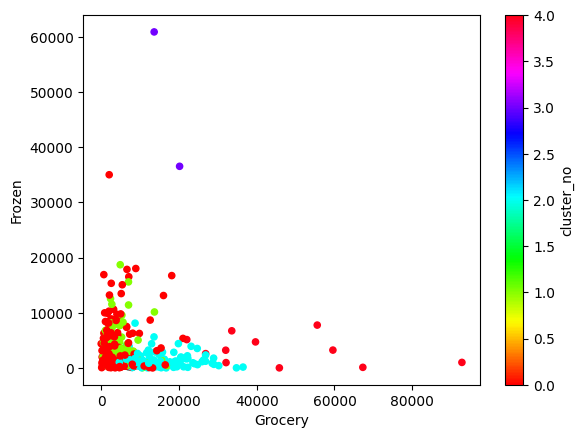

In [45]:
# %%
# 시각화
df.plot(kind="scatter", x="Fresh", y="Milk", c="cluster_no",cmap = "hsv")
df.plot(kind="scatter", x="Grocery", y="Frozen", c="cluster_no",cmap = "hsv")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

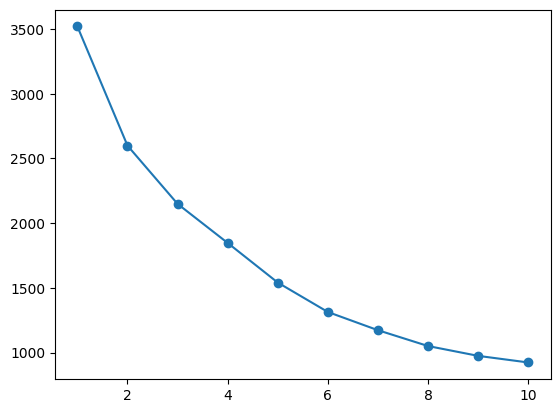

In [46]:
# %%
# 엘보 방법
d = []
for i in range(1,10+1):
  kmc_i = cluster.KMeans(n_clusters=i, random_state=1)
  kmc_i.fit(X)
  d.append(kmc_i.inertia_)
plt.plot(range(1,10+1), d, marker="o")


## 실루엣 점수

In [47]:
# %%
# 실루엣 점수
# 최적의 k값을 찾는 방법
from sklearn.metrics import silhouette_score
for i in range(2, 5+1):
  kmc_i = cluster.KMeans(n_clusters=i, random_state=1)
  kmc_i.fit(X)
  pred = kmc_i.labels_
  print("K = ", i)
  print(silhouette_score(X, pred, metric="euclidean"))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K =  2
0.37323337301762427
K =  3
0.3567685389017652
K =  4
0.36831361173098737
K =  5
0.3503339062192662


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# %%
# 최종 모델 k = 2
kmc = cluster.KMeans(n_clusters=2, random_state=1)
kmc.fit(X)

In [49]:
# %%
cluster_label = kmc.labels_
df["cluster_no"] = cluster_label
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_no
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


In [50]:
# %%
grouped = df.iloc[:,2:9].groupby("cluster_no")
print(grouped.describe())
print(grouped.mean())

            Fresh                                                             \
            count          mean           std   min     25%     50%      75%   
cluster_no                                                                     
0           135.0   8441.229630   8579.579218  18.0  2228.5  5550.0  12013.5   
1           305.0  13575.622951  13799.508905   3.0  4155.0  9658.0  18291.0   

            ...   Delicassen                                                    
            ...         mean          std  min    25%     50%     75%      max  
cluster_no  ...                                                                 
0           ...  2108.311111  4444.497284  3.0  554.0  1371.0  2157.5  47943.0  
1           ...  1266.626230  1599.850428  3.0  395.0   823.0  1550.0  14472.0  

[2 rows x 48 columns]
                   Fresh          Milk       Grocery       Frozen  \
cluster_no                                                          
0            8441.229630  11394.4

#분류

## 로지스틱 회귀 (DT)

In [55]:
# %%
# 3-3 Decision Tree
import pandas as pd
import numpy as np

# [Step 1] 데이터 준비/기본 설정

# Breast Cancer 데이터셋 가져오기(출처: UCI MI, Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df = pd.read_csv(uci_path, header=None)

# 열 이름 지정
df.columns = ["id","clump","cell_size","cell_shape","adhesion","epithlial",
              "bare_nuclei", "chromatin","normal_nucleoli", "mitoses", "class"]

# Ipython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option("display.max_column",15)

# [Step 2] 데이터 탐색

# 데이터 살펴보기
print(df.head())

# 데이터 자료형 확인
print(df.info())

# 데이터 통계 요약 정보 확인
df.describe()

        id  clump  cell_size  cell_shape  adhesion  epithlial bare_nuclei  \
0  1000025      5          1           1         1          2           1   
1  1002945      5          4           4         5          7          10   
2  1015425      3          1           1         1          2           2   
3  1016277      6          8           8         1          3           4   
4  1017023      4          1           1         3          2           1   

   chromatin  normal_nucleoli  mitoses  class  
0          3                1        1      2  
1          3                2        1      2  
2          3                1        1      2  
3          3                7        1      2  
4          3                1        1      2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               699 non-null    int64 
 1   clum

,id,clump,cell_size,cell_shape,adhesion,epithlial,chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [56]:
# %%
# 유방암 데이터
df[df["bare_nuclei"]=="?"]
df.bare_nuclei.replace("?",np.nan,inplace=True) #?을 np.nan으로 변경
df.dropna(subset=["bare_nuclei"],axis=0,inplace=True) 
df.bare_nuclei= df.bare_nuclei.astype("int")
df.describe()

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [57]:
# %%
## 훈련,테스트 데이터 분할
## 독립변수
X = df.iloc[:,1:10]
## 종속변수
y=df["class"]
#독립 변수 열 이름 저장 => 의사결정나무 그릴 때 사용 예정
colname = X.columns
## 표준화
ss =preprocessing.StandardScaler()
X= ss.fit(X).transform(X)
# train data와 test data로 구분 (7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)
print("train data: ", X_train.shape)
print("test data: ", X_test.shape)

train data:  (478, 9)
test data:  (205, 9)


In [61]:
# %%
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
# 모형 객체
logit = LogisticRegression()
# 모형 학습
logit.fit(X_train,y_train)

# 모형 평가
y_hat = logit.predict(X_test)
print(y_test[:5])
print(y_hat[:5])

print("회귀계수 : ",logit.coef_)
print("절편 : ",logit.intercept_)

286    4
272    4
455    4
457    4
247    4
Name: class, dtype: int64
[4 4 4 4 4]
회귀계수 :  [[ 1.4248581  -0.02312753  0.61037065  0.79978761  0.38436958  1.26494965
   1.04616295  0.69851565  0.80830886]]
절편 :  [-1.1960436]


In [59]:
# %%
from sklearn import metrics
logit_cm = metrics.confusion_matrix(y_test,y_hat)
logit_cm 

array([[128,   3],
       [  4,  70]])

In [60]:
# %%
logit_cm_report = metrics.classification_report(y_test,y_hat)
print(logit_cm_report)


              precision    recall  f1-score   support

           2       0.97      0.98      0.97       131
           4       0.96      0.95      0.95        74

    accuracy                           0.97       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.97      0.97      0.97       205



## 전체 나무 성장

In [62]:
# %%
# 전체 나무 성장
import pandas as pd
import numpy as np

# [Step 1] 데이터 준비/기본 설정

# Breast Cancer 데이터셋 가져오기(출처: UCI MI, Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df = pd.read_csv(uci_path, header=None)

# 열 이름 지정
df.columns = ["id","clump","cell_size","cell_shape","adhesion","epithlial",
              "bare_nuclei", "chromatin","normal_nucleoli", "mitoses", "class"]

# Ipython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option("display.max_column",15)

# [Step 2] 데이터 탐색

# 데이터 살펴보기
print(df.head())

# 데이터 자료형 확인
print(df.info())

# 데이터 통계 요약 정보 확인
df.describe()

        id  clump  cell_size  cell_shape  adhesion  epithlial bare_nuclei  \
0  1000025      5          1           1         1          2           1   
1  1002945      5          4           4         5          7          10   
2  1015425      3          1           1         1          2           2   
3  1016277      6          8           8         1          3           4   
4  1017023      4          1           1         3          2           1   

   chromatin  normal_nucleoli  mitoses  class  
0          3                1        1      2  
1          3                2        1      2  
2          3                1        1      2  
3          3                7        1      2  
4          3                1        1      2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               699 non-null    int64 
 1   clum

,id,clump,cell_size,cell_shape,adhesion,epithlial,chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [63]:
# %%
# 유방암 데이터
df[df["bare_nuclei"]=="?"]
df.bare_nuclei.replace("?",np.nan,inplace=True) #?을 np.nan으로 변경
df.dropna(subset=["bare_nuclei"],axis=0,inplace=True) 
df.bare_nuclei= df.bare_nuclei.astype("int")
df.describe()

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [64]:
# %%
## 훈련,테스트 데이터 분할
## 독립변수
X = df.iloc[:,1:10]
## 종속변수
y=df["class"]

# train data와 test data로 구분 (7:3 비율)
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(X,y,
test_size=0.3,random_state=10)

print("train data: ", train_input.shape)
print("test data: ", test_input.shape)

## 표준화
ss =preprocessing.StandardScaler()
train_ss= ss.fit(train_input).transform(train_input)
test_ss = ss.fit(test_input).transform(test_input)



train data:  (478, 9)
test data:  (205, 9)


In [65]:
# %%
# 의사결정나무 - 전체나무성장
from sklearn import tree
# 모형 객체
dt = tree.DecisionTreeClassifier()
# 모형 학습 - 표준화 데이터
dt.fit(train_ss,train_target)

DecisionTreeClassifier()

### 과대적합/과소적합

In [66]:
# %%
# 훈련 점수
print(dt.score(train_ss, train_target))
# 테스트 점수
print(dt.score(test_ss,test_target))
# 과대적합이 되어 있는 모델

1.0
0.9609756097560975


[Text(0.5040322580645161, 0.9444444444444444, 'x[1] <= 0.117\ngini = 0.452\nsamples = 478\nvalue = [313, 165]'),
 Text(0.18548387096774194, 0.8333333333333334, 'x[5] <= -0.268\ngini = 0.154\nsamples = 333\nvalue = [305, 28]'),
 Text(0.0967741935483871, 0.7222222222222222, 'x[7] <= 1.841\ngini = 0.014\nsamples = 289\nvalue = [287, 2]'),
 Text(0.06451612903225806, 0.6111111111111112, 'x[8] <= 1.216\ngini = 0.007\nsamples = 288\nvalue = [287, 1]'),
 Text(0.03225806451612903, 0.5, 'gini = 0.0\nsamples = 285\nvalue = [285, 0]'),
 Text(0.0967741935483871, 0.5, 'x[1] <= -0.536\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.06451612903225806, 0.3888888888888889, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.12903225806451613, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.12903225806451613, 0.6111111111111112, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.27419354838709675, 0.7222222222222222, 'x[0] <= -0.331\ngini = 0.483\nsamples = 44\nvalue = [18,

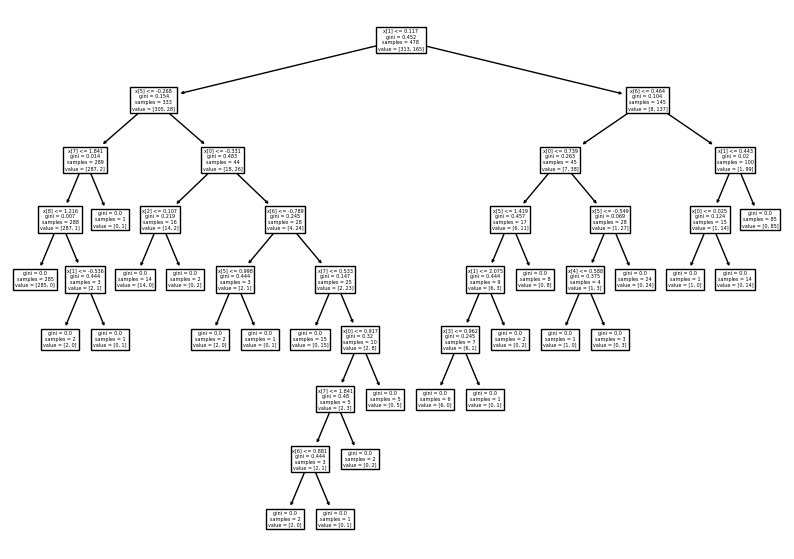

In [67]:
# %%
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)

### 가지치기

In [68]:
# %%
### 가지치기
# 과대적합 해결 방법 - 나무의 깊이 제한
# 의사결정나무 - 전체나무 성장
from sklearn import tree
# 모형 객체
dt = tree.DecisionTreeClassifier(max_depth=3)
# 모형 학습 - 표준화 데이터
dt.fit(train_ss,train_target)

# 훈련 점수
print(dt.score(train_ss, train_target))
# 테스트 점수
print(dt.score(test_ss,test_target))

0.9686192468619247
0.9658536585365853


[Text(0.5, 0.875, 'cell_size <= 0.117\ngini = 0.452\nsamples = 478\nvalue = [313, 165]'),
 Text(0.25, 0.625, 'bare_nuclei <= -0.268\ngini = 0.154\nsamples = 333\nvalue = [305, 28]'),
 Text(0.125, 0.375, 'normal_nucleoli <= 1.841\ngini = 0.014\nsamples = 289\nvalue = [287, 2]'),
 Text(0.0625, 0.125, 'gini = 0.007\nsamples = 288\nvalue = [287, 1]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.375, 0.375, 'clump <= -0.331\ngini = 0.483\nsamples = 44\nvalue = [18, 26]'),
 Text(0.3125, 0.125, 'gini = 0.219\nsamples = 16\nvalue = [14, 2]'),
 Text(0.4375, 0.125, 'gini = 0.245\nsamples = 28\nvalue = [4, 24]'),
 Text(0.75, 0.625, 'chromatin <= 0.464\ngini = 0.104\nsamples = 145\nvalue = [8, 137]'),
 Text(0.625, 0.375, 'clump <= 0.739\ngini = 0.263\nsamples = 45\nvalue = [7, 38]'),
 Text(0.5625, 0.125, 'gini = 0.457\nsamples = 17\nvalue = [6, 11]'),
 Text(0.6875, 0.125, 'gini = 0.069\nsamples = 28\nvalue = [1, 27]'),
 Text(0.875, 0.375, 'cell_size <= 0.443\ngini = 0.

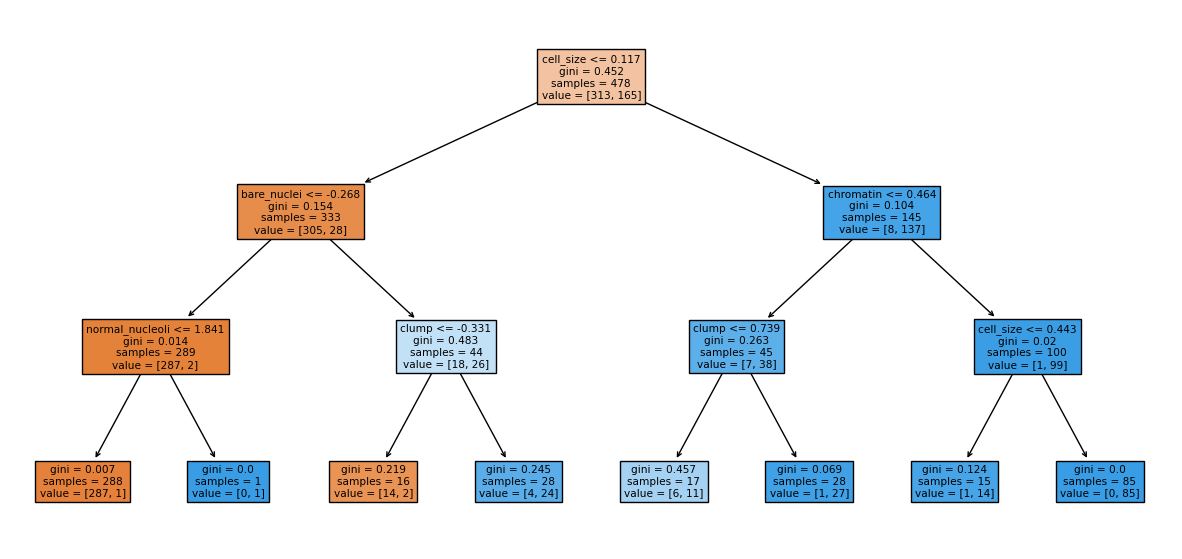

In [70]:
# %%
plt.figure(figsize=((15,7)))
plot_tree(dt, filled=True, feature_names=X.columns.values)

### 표준화 없이 시각화

[Text(0.5, 0.875, 'cell_size <= 3.5\ngini = 0.452\nsamples = 478\nvalue = [313, 165]'),
 Text(0.25, 0.625, 'bare_nuclei <= 2.5\ngini = 0.154\nsamples = 333\nvalue = [305, 28]'),
 Text(0.125, 0.375, 'normal_nucleoli <= 8.5\ngini = 0.014\nsamples = 289\nvalue = [287, 2]'),
 Text(0.0625, 0.125, 'gini = 0.007\nsamples = 288\nvalue = [287, 1]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.375, 0.375, 'clump <= 3.5\ngini = 0.483\nsamples = 44\nvalue = [18, 26]'),
 Text(0.3125, 0.125, 'gini = 0.219\nsamples = 16\nvalue = [14, 2]'),
 Text(0.4375, 0.125, 'gini = 0.245\nsamples = 28\nvalue = [4, 24]'),
 Text(0.75, 0.625, 'chromatin <= 4.5\ngini = 0.104\nsamples = 145\nvalue = [8, 137]'),
 Text(0.625, 0.375, 'clump <= 6.5\ngini = 0.263\nsamples = 45\nvalue = [7, 38]'),
 Text(0.5625, 0.125, 'gini = 0.457\nsamples = 17\nvalue = [6, 11]'),
 Text(0.6875, 0.125, 'gini = 0.069\nsamples = 28\nvalue = [1, 27]'),
 Text(0.875, 0.375, 'cell_size <= 4.5\ngini = 0.02\nsamples = 10

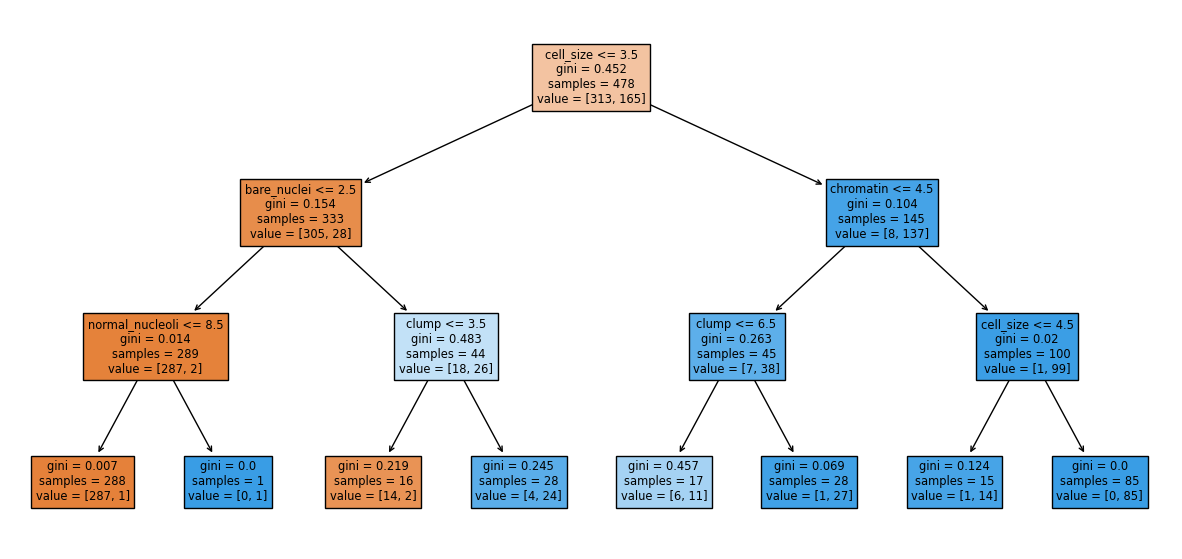

In [71]:
# %%
# 모형 객체
dt = tree.DecisionTreeClassifier(max_depth=3)
# 모형 학습 - 원래 데이터
dt.fit(train_input,train_target)

plt.figure(figsize=((15,7)))
plot_tree(dt, filled=True, feature_names=X.columns.values)

### 특성 중요도

In [72]:
# %%
print(X.columns.values)
print(dt.feature_importances_)


['clump' 'cell_size' 'cell_shape' 'adhesion' 'epithlial' 'bare_nuclei'
 'chromatin' 'normal_nucleoli' 'mitoses']
[0.06787743 0.77944865 0.         0.         0.         0.13553208
 0.00684272 0.01029913 0.        ]


##교차 검증

In [ ]:
# %%
import pandas as pd
import numpy as np

# [Step 1] 데이터 준비/기본 설정

# Breast Cancer 데이터셋 가져오기(출처: UCI MI, Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df = pd.read_csv(uci_path, header=None)

# 열 이름 지정
df.columns = ["id","clump","cell_size","cell_shape","adhesion","epithlial",
              "bare_nuclei", "chromatin","normal_nucleoli", "mitoses", "class"]

# Ipython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option("display.max_column",15)

# [Step 2] 데이터 탐색

# 데이터 살펴보기
print(df.head())

# 데이터 자료형 확인
print(df.info())

# 데이터 통계 요약 정보 확인
df.describe()

In [73]:
# %%
# 유방암 데이터
df[df["bare_nuclei"]=="?"]
df.bare_nuclei.replace("?",np.nan,inplace=True) #?을 np.nan으로 변경
df.dropna(subset=["bare_nuclei"],axis=0,inplace=True) 
df.bare_nuclei= df.bare_nuclei.astype("int")
df.describe()


,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [74]:
# %%
## 훈련,테스트 데이터 분할
## 독립변수
X = df.iloc[:,1:10]
## 종속변수
y=df["class"]

# train data와 test data로 구분 (7:3 비율)
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(X,y,
test_size=0.3,random_state=10)

print("train data: ", train_input.shape)
print("test data: ", test_input.shape)

train data:  (478, 9)
test data:  (205, 9)


In [77]:
# %%
# 훈련 검증 데이터 분할
train_sub_input, val_input, train_sub_target, val_target = train_test_split(
  train_input,train_target,test_size=0.2, random_state=10)
print(train_sub_input.shape,val_input.shape)

(382, 9) (96, 9)


In [78]:
# %%
# 모형 객체
dt = tree.DecisionTreeClassifier(max_depth=3)
# 모형 학습 - 훈련 데이터 382 + 96
dt.fit(train_input, train_target)
# 모형 평가 - 검증 데이터 96
# 훈련 점수
print(dt.score(train_input, train_target))
# 테스트 점수
print(dt.score(test_input,test_target))

0.9790575916230366
0.9270833333333334


In [79]:
# %%
# 교차검증
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.0056963 , 0.00321054, 0.00299072, 0.00256157, 0.00227547]), 'score_time': array([0.00604606, 0.00228381, 0.00169325, 0.00156665, 0.00190115]), 'test_score': array([0.94791667, 0.9375    , 0.92708333, 0.91578947, 0.95789474])}


In [80]:
# %%
scores["test_score"]

array([0.94791667, 0.9375    , 0.92708333, 0.91578947, 0.95789474])

In [81]:
# %%
import numpy as np
np.mean(scores["test_score"])


0.937236842105263

### 하이퍼파라미터 튜닝

In [82]:
# %%
### 하이퍼파라미터 튜닝
# 매개변수 조정을 통해서 최적 모델 찾는 과정
# 그리드서치
from sklearn.model_selection import GridSearchCV
# 노드 분할하기 위한 불순도 감소 최소량
params = {"min_impurity_decrease":[0.0001,0.0002,0.0003,0.0004,0.0005]}


In [83]:
# %%
from sklearn.tree import DecisionTreeClassifier
gs = GridSearchCV(tree.DecisionTreeClassifier(), params)

In [84]:
# %%
# 파라미터 5개 * 5 폴드 = 25번 반복 = 25개 모델
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

### 하이퍼파라미터 튜닝2

In [105]:
# %%
### 하이퍼파라미터 튜닝
# 매개변수 조정을 통해서 최적 모델 찾는 과정
# 그리드서치
from sklearn.model_selection import GridSearchCV
# 노드 분할하기 위한 불순도 감소 최소량
params = {"min_impurity_decrease":[0.0001,0.0002,0.0003,0.0004,0.0005],
          "max_depth": range(3,10+1,1),
          "min_samples_split": range(2,100,5)} # 모델 350개 생성


In [106]:
# %%
from sklearn.tree import DecisionTreeClassifier
gs = GridSearchCV(tree.DecisionTreeClassifier(), params)

# %%
# 파라미터 5개 * 5 폴드 = 25번 반복 = 25개 모델
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(3, 11),
                         'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005],
                         'min_samples_split': range(2, 100, 5)})

In [107]:
# %%
# %%
# 최적의 모델
dt = gs.best_estimator_
print(dt.score(train_input, train_target))
print(dt.score(test_input,test_target))

0.9707112970711297
0.9609756097560975
